In [4]:
%reload_ext autoreload
%autoreload 2
from ripple_heterogeneity.assembly import assembly_reactivation, assembly
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nelpy as nel
from itertools import chain


In [ ]:
member_color: str = "#6768ab",

(<Figure size 700x300 with 6 Axes>,
 array([<AxesSubplot: xlabel='Weights (a.u.)', ylabel='Neurons #'>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >], dtype=object))

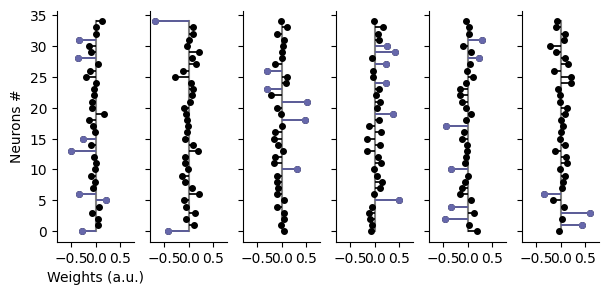

In [100]:
basepath = r"Z:\Data\HMC2\day9"
# create the object assembly_react
assembly_react = assembly_reactivation.AssemblyReact(
    basepath=basepath,
    )

# load need data (spikes, ripples, epochs)
assembly_react.load_data()

assembly_react.restrict_epochs_to_pre_task_post()

# detect assemblies 
assembly_react.get_weights(assembly_react.epochs[1])

# visually inspect weights for each assembly
assembly_react.plot()

# compute time resolved signal for each assembly
# assembly_act = assembly_react.get_assembly_act()

In [ ]:
assembly_react.find_members()

In [27]:
assembly_react

<AssemblyReact: 35 units, 6 assemblies> of length 7:39:34:191 hours

In [38]:
def toyExample(assemblies, nneurons=10, nbins=1000, rate=1.0):

    np.random.seed(42)

    actmat = np.random.poisson(rate, nneurons * nbins).reshape(nneurons, nbins)
    assemblies.actbins = [None] * len(assemblies.membership)
    for (ai, members) in enumerate(assemblies.membership):

        members = np.array(members)
        nact = int(nbins * assemblies.actrate[ai])
        actstrength_ = rate * assemblies.actstrength[ai]

        actbins = np.argsort(np.random.rand(nbins))[0:nact]

        actmat[members.reshape(-1, 1), actbins] = (
            np.ones((len(members), nact)) + actstrength_
        )

        assemblies.actbins[ai] = np.sort(actbins)

    return actmat

class toyassemblies:
    def __init__(self, membership, actrate, actstrength):

        self.membership = membership
        self.actrate = actrate
        self.actstrength = actstrength

<AxesSubplot: >

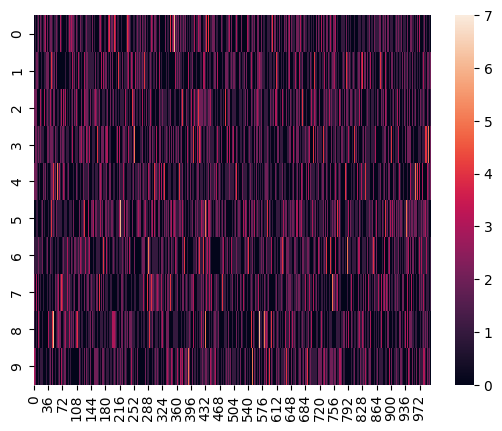

In [44]:
nneurons=10
nbins=1000
rate=1.0
actmat = np.random.poisson(rate, nneurons * nbins).reshape(nneurons, nbins)
sns.heatmap(actmat)

In [46]:
patterns, significance, zactmat = assembly.runPatterns(actmat)

d:\github\ripple_heterogeneity\ripple_heterogeneity\assembly\assembly.py:208: UserWarning: no assembly detected


In [ ]:
n_samples, n_features, rank = 1000, 25, 5
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T).T


In [176]:
# test runPatterns ICA, MP (marcenkopastur)
patterns, significance, zactmat = assembly.runPatterns(X>.5,method="ica",nullhyp="mp")
assert patterns.shape[0] == rank
assert X.shape == zactmat.shape


AssertionError: 

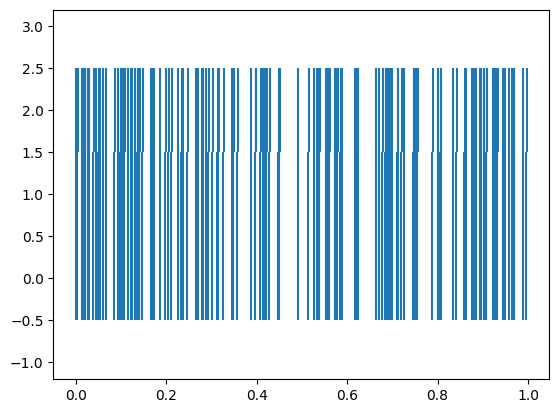

In [217]:
spike_times = [st.as_array() for st in lsjdf.patt1]
plt.eventplot(spike_times)

In [207]:
# sns.heatmap(lsjdf.bin_patt1.to_array())

patterns, significance, zactmat = assembly.runPatterns(lsjdf.msip.to_array(),method="ica",nullhyp="mp")
patterns

array([[ 0.70547354,  0.70547354,  0.02458039,  0.01632409,  0.01632409,
         0.04785434, -0.02337441, -0.02337441,  0.00970886],
       [-0.02741628, -0.02741628, -0.00664983,  0.70341883,  0.70341883,
         0.09120255,  0.00502263,  0.00502263,  0.02209095],
       [ 0.00412557,  0.00412557,  0.06459259, -0.00577069, -0.00577069,
        -0.00576365,  0.70433128,  0.70433128,  0.05940408]])

In [249]:
# np.array([spike_times_1,spike_times_2,spike_times_3]).shape
np.array(list(chain.from_iterable([spike_times_1,spike_times_2,spike_times_3])))

C:\Users\Cornell\AppData\Local\Temp\ipykernel_22240\3550746884.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


(30,)

C:\Users\Cornell\AppData\Local\Temp\ipykernel_22240\3187426516.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


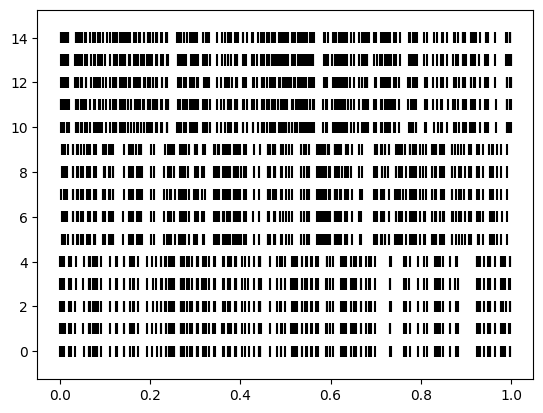

In [321]:
# lags1 = [0, 0.001]
# Number of pattern occurrences
n_occ1 = 150
n_occ2 = 170
n_occ3 = 210

# Pattern lags
lags1 = 0.001
lags2 = 0.002
lags3 = 0.003

x = np.sort(np.random.uniform(0, 1 - lags1, n_occ1))
spike_times_1 = [x + np.random.uniform(0, lags1, n_occ1) for _ in np.arange(0,.05,.01)]

x = np.sort(np.random.uniform(0, 1 - lags2, n_occ2))
spike_times_2 = [x + np.random.uniform(0, lags2, n_occ2) for _ in np.arange(0,.05,.01)]

x = np.sort(np.random.uniform(0, 1 - lags3, n_occ3))
spike_times_3 = [x + np.random.uniform(0, lags3, n_occ3) for _ in np.arange(0,.05,.01)]

spike_times = np.array(list(chain.from_iterable([spike_times_1,spike_times_2,spike_times_3])))
plt.eventplot(spike_times, linelengths=0.5, colors="k")
plt.show()

st = nel.SpikeTrainArray(timestamps=spike_times)


(<Figure size 400x200 with 3 Axes>,
 array([<AxesSubplot: xlabel='Weights (a.u.)', ylabel='Neurons #'>,
        <AxesSubplot: >, <AxesSubplot: >], dtype=object))

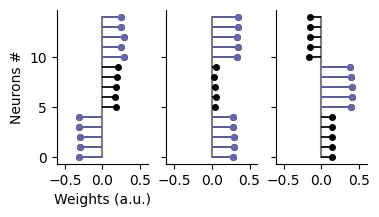

In [322]:
assembly_react = assembly_reactivation.AssemblyReact(
    )
assembly_react.add_st(st)
assembly_react.get_weights()
assembly_react.plot()

In [2]:
from scipy import stats
def lif_neuron(n_steps=1000, alpha=0.01, rate=10):
    """ Simulate a linear integrate-and-fire neuron.

    Args:
    n_steps (int): The number of time steps to simulate the neuron's activity.
    alpha (float): The input scaling factor
    rate (int): The mean rate of incoming spikes

    """
    # Precompute Poisson samples for speed
    exc = stats.poisson(rate).rvs(n_steps)

    # Initialize voltage and spike storage
    v = np.zeros(n_steps)
    spike_times = []

    # Loop over steps
    for i in range(1, n_steps):

        # Update v
        dv = alpha * exc[i]
        v[i] = v[i-1] + dv

        # If spike happens, reset voltage and record
        if v[i] > 1:
            spike_times.append(i)
            v[i] = 0

    return v, spike_times

v, spike_times = lif_neuron()

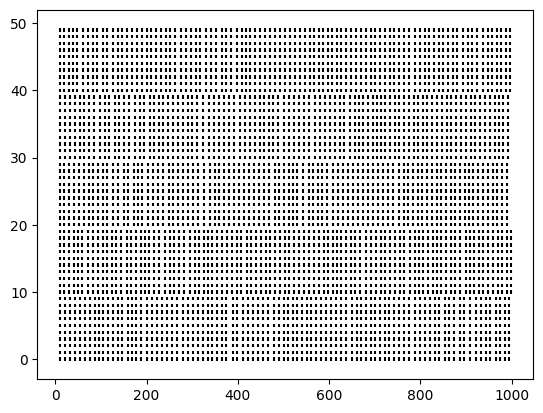

In [94]:
def jitter(spike_times, rate=10, jitter_amount=0.001):
    return [spike_times + stats.poisson(rate).rvs(len(spike_times)) * jitter_amount for _ in np.arange(0,.1,.01)]

v, spike_times_ = lif_neuron()
spike_times_1 = jitter(spike_times_, rate=10)

v, spike_times_ = lif_neuron()
spike_times_2 = jitter(spike_times_, rate=5)

v, spike_times_ = lif_neuron()
spike_times_3 = jitter(spike_times_, rate=2)

v, spike_times_ = lif_neuron()
spike_times_4 = jitter(spike_times_, rate=1)

v, spike_times_ = lif_neuron()
spike_times_5 = jitter(spike_times_, rate=.5)

spike_times = np.array(list(chain.from_iterable([spike_times_1,spike_times_2,spike_times_3,spike_times_4,spike_times_5])),dtype=object)
plt.eventplot(spike_times, linelengths=0.5, colors="k")
plt.show()

(<Figure size 1000x400 with 5 Axes>,
 array([<AxesSubplot: xlabel='Weights (a.u.)', ylabel='Neurons #'>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       dtype=object))

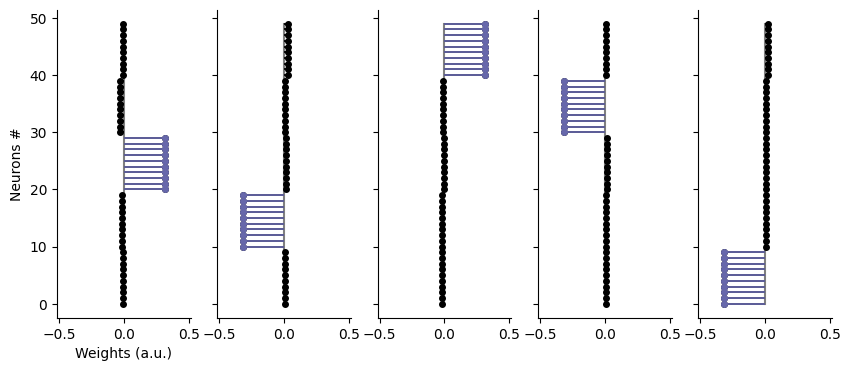

In [95]:
st = nel.SpikeTrainArray(timestamps=spike_times)
assembly_react = assembly_reactivation.AssemblyReact(
    )
assembly_react.add_st(st)
assembly_react.get_weights()
assembly_react.plot(figsize=(10,4))

In [97]:
for _ in range(200):
    v, spike_times_ = lif_neuron()
    spike_times_1 = jitter(spike_times_, rate=10)

    v, spike_times_ = lif_neuron()
    spike_times_2 = jitter(spike_times_, rate=10)

    v, spike_times_ = lif_neuron()
    spike_times_3 = jitter(spike_times_, rate=10)

    v, spike_times_ = lif_neuron()
    spike_times_4 = jitter(spike_times_, rate=10)

    v, spike_times_ = lif_neuron()
    spike_times_5 = jitter(spike_times_, rate=10)

    spike_times = np.array(list(chain.from_iterable([spike_times_1,spike_times_2,spike_times_3,spike_times_4,spike_times_5])),dtype=object)

    st = nel.SpikeTrainArray(timestamps=spike_times)
    assembly_react = assembly_reactivation.AssemblyReact(
        )
    assembly_react.add_st(st)
    assembly_react.get_weights()

    assert assembly_react.n_assemblies() == 5


In [392]:
[np.sum(assembly_react.assembly_members[i]) for i in range(0,assembly_react.n_assemblies())]

[10, 10, 10, 10, 10]

<AxesSubplot: >

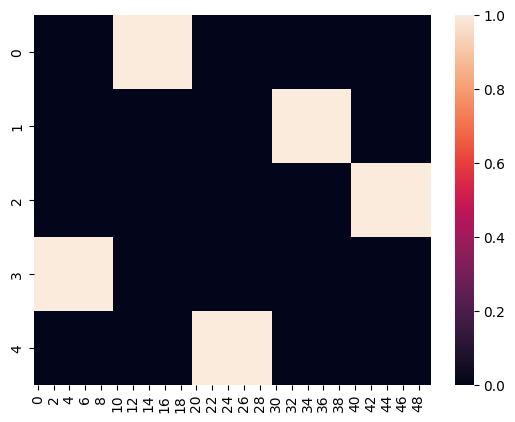

In [385]:
sns.heatmap(assembly_react.assembly_members)

In [47]:
edges = np.linspace(0,len(spike_times_1[0]),4).astype(int)
edges

array([  0,  94, 189, 284])

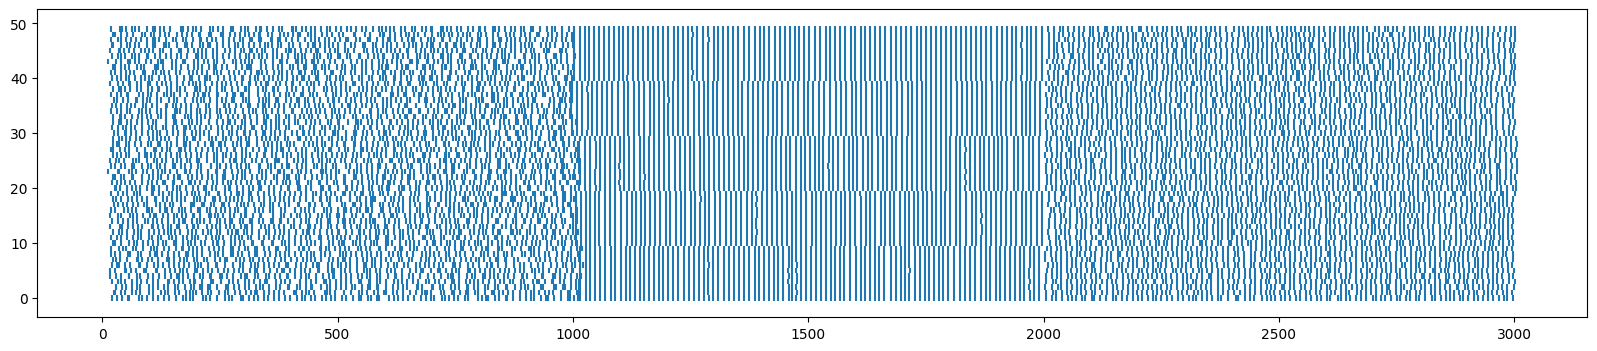

In [59]:
def jitter(spike_times, rate=10, jitter_amount=0.01):
    return [spike_times + stats.poisson(rate).rvs(len(spike_times)) * jitter_amount for _ in np.arange(0,.1,.01)]

def create_pre_task_post_assembly():
    v, spike_times_ = lif_neuron(n_steps=3000,rate=10)

    spike_times_1 = jitter(spike_times_, rate=10)
    edges = np.linspace(0,len(spike_times_1[0]),4).astype(int)

    spike_times_jittered = jitter(spike_times_, rate=10,jitter_amount=1)
    for i in range(0,len(spike_times_1)):
        spike_times_1[i][edges[0]:edges[1]] = spike_times_jittered[i][edges[0]:edges[1]]

    spike_times_jittered = jitter(spike_times_, rate=10,jitter_amount=.5)
    for i in range(0,len(spike_times_1)):
        spike_times_1[i][edges[2]:edges[3]] = spike_times_jittered[i][edges[2]:edges[3]]

    return spike_times_1

spike_times_1 = create_pre_task_post_assembly()  
spike_times_2 = create_pre_task_post_assembly() 
spike_times_3 = create_pre_task_post_assembly()
spike_times_4 = create_pre_task_post_assembly()
spike_times_5 = create_pre_task_post_assembly()

spike_times = np.array(list(chain.from_iterable([spike_times_1,spike_times_2,spike_times_3,spike_times_4,spike_times_5])),dtype=object)

plt.figure(figsize=(20,4))
plt.eventplot(spike_times)
plt.show()

(<Figure size 1000x400 with 5 Axes>,
 array([<AxesSubplot: xlabel='Weights (a.u.)', ylabel='Neurons #'>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       dtype=object))

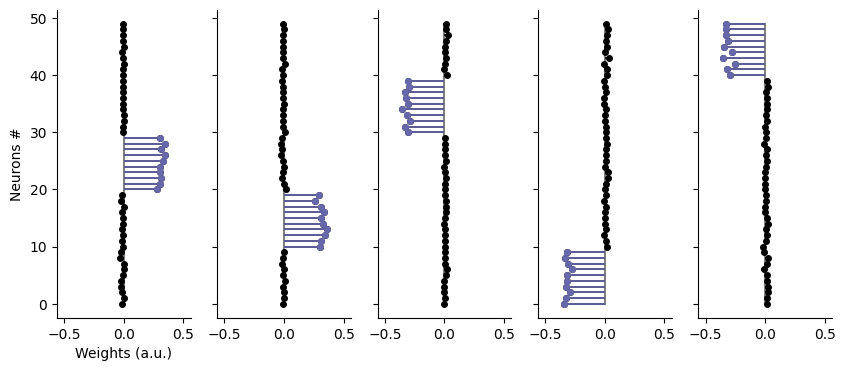

In [76]:
st = nel.SpikeTrainArray(timestamps=spike_times)
epochs = nel.EpochArray(np.array([[0,1000],[1000,2000],[2000,3000]]))

assembly_react = assembly_reactivation.AssemblyReact(z_mat_dt=5
    )
assembly_react.add_st(st)
assembly_react.get_weights(epochs[1])
assembly_react.plot(figsize=(10,4))

In [77]:
assembly_act = assembly_react.get_assembly_act()

In [87]:
assembly_act

<AnalogSignalArray at 0x24ec06ae7c0: 5 signals> for a total of 49:50 minutes

In [86]:
assert all(assembly_act[epochs[0]].mean(axis=1) < assembly_act[epochs[2]].mean(axis=1))

In [83]:
assembly_act[epochs[2]].mean(axis=1)


array([2.79107197, 2.82372295, 3.07155632, 2.91494209, 3.45107088])

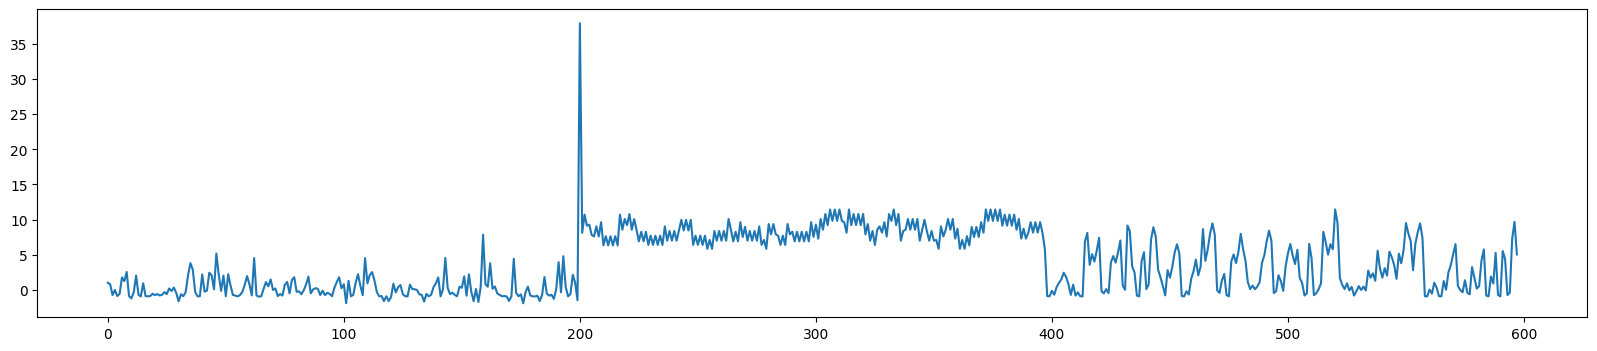

In [78]:
plt.figure(figsize=(20,4))
plt.plot(assembly_act.data[0].T)
plt.show()

In [137]:
import numpy as np

from scipy import linalg

n_samples, n_features, rank = 1000, 25, 5
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T).T

# test runPatterns ICA, MP (marcenkopastur)
patterns, significance, zactmat = assembly.runPatterns(X,method="ica",nullhyp="mp")
assert patterns.shape[0] == rank
assert X.shape == zactmat.shape

# test runPatterns ICA, bin shuffle
patterns, significance, zactmat = assembly.runPatterns(X,method="ica",nullhyp="bin",nshu=100)
assert patterns.shape[0] == rank
assert X.shape == zactmat.shape

# test runPatterns ICA, circ shuffle
patterns, significance, zactmat = assembly.runPatterns(X,method="ica",nullhyp="circ",nshu=100)
assert patterns.shape[0] == rank
assert X.shape == zactmat.shape

# test runPatterns PCA, MP (marcenkopastur)
patterns, significance, zactmat = assembly.runPatterns(X,method="pca",nullhyp="mp")
assert patterns.shape[0] == rank
assert X.shape == zactmat.shape

# test runPatterns PCA, bin shuffle
patterns, significance, zactmat = assembly.runPatterns(X,method="pca",nullhyp="bin",nshu=100)
assert patterns.shape[0] == rank
assert X.shape == zactmat.shape

# test runPatterns PCA, circ shuffle
patterns, significance, zactmat = assembly.runPatterns(X,method="pca",nullhyp="circ",nshu=100)
assert patterns.shape[0] == rank
assert X.shape == zactmat.shape

# test computeAssemblyActivity
patterns, significance, zactmat = assembly.runPatterns(X,method="ica",nullhyp="mp")
assemblyAct = assembly.computeAssemblyActivity(patterns, zactmat, zerodiag=True)
assert assemblyAct.shape == (rank, X.shape[1])

# test no patterns found
n_samples, n_features, rank = 1000, 25, 0
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T).T
patterns, significance, zactmat = assembly.runPatterns(X,method="ica",nullhyp="mp")
assert patterns is None


c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
d:\github\ripple_heterogeneity\ripple_heterogeneity\assembly\assembly.py:199: UserWarning: no active neurons

In [139]:
n_samples, n_features, rank = 1000, 25, 0
X = np.zeros((n_samples, n_features))

X[]

In [157]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [158]:
np.fill_diagonal(X, 1)

In [162]:
n_samples, n_features, rank = 1000, 1000, 0

X = np.zeros([n_samples, n_features],int)
np.fill_diagonal(X, 1)
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
# make zero matrix with 1s on diagonal
X = np.zeros((n_samples, n_features))
X = np.fill_diagonal(X, 1, wrap=True)
sns.heatmap(X.T)

In [167]:
n_samples, n_features, rank = 1000, 25, 0
X = np.zeros([n_samples, n_features],int).T
np.fill_diagonal(X, 1)

patterns, significance, zactmat = assembly.runPatterns(X,method="ica",nullhyp="mp")
patterns,significance,zactmat

d:\github\ripple_heterogeneity\ripple_heterogeneity\assembly\assembly.py:220: UserWarning: no assembly detected


(None, PCA(), None)

In [119]:
found_patterns

[]

In [ ]:
X = np.random.rand(n_samples,n_features)
found_patterns = []
for i in range(1000):
    patterns, significance, zactmat = assembly.runPatterns(X.T,method="ica",nullhyp="mp")
    if patterns is not None:
        found_patterns.append(True)

<AxesSubplot: >

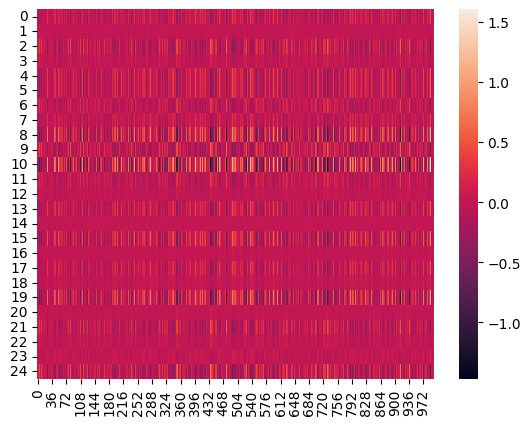

In [105]:
sns.heatmap(X.T)

(25, 1000)

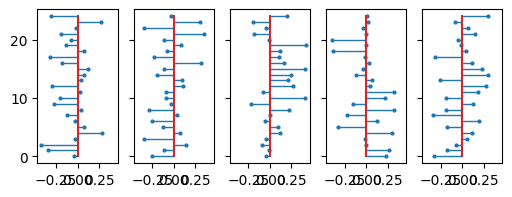

In [72]:
fig, axes = plt.subplots(
    1,
    patterns.shape[0],
    figsize=(patterns.shape[0]+ 1, np.round(patterns.shape[0] / 2)),
    sharey=True,
    sharex=True,
)

for i in range(patterns.shape[0]):
    markerline, stemlines, baseline = axes[i].stem(
        patterns[i, :], orientation="horizontal"
    )
    plt.setp(stemlines, linewidth=1)
    plt.setp(markerline, markersize=2)